# Investigating Fandango Movie Ratings

This project is to follow up on the work of Walt Hickey in which he discovered through analysis that Fandango had a biased rating system for their movies. Here, we will be checking if changes have been made to their rating system since Walt Hickey's discovery in 2015.

We will be analyzing two sets of data one from before Hickey's discovery and the other from after.

In [1]:
import pandas as pd
pd.options.display.max_columns = 100  # to prevent truncated output

before = pd.read_csv('fandango_score_comparison.csv')
after = pd.read_csv('movie_ratings_16_17.csv')

before.head(3)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,Metacritic_norm,Metacritic_user_nom,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,3.30,3.55,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,3.35,3.75,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,3.20,4.05,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5


In [2]:
after.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


We select columns that hold information valuable to our analysis.

In [3]:
fandango_before = before[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes',
                             'Fandango_Difference']].copy()
fandango_after = after[['movie', 'year', 'fandango']].copy()

fandango_after.head(3)

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0


In [4]:
fandango_before.head(3)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5


Our goal is to determine whether there has been any change in Fandango's rating system after Hickey's analysis.
The population of interest to us are all movies rated on the website regardless of year or any other criteria.
For this comparison analysis, our samples should be gotten from before and after Hickey's analysis.

Studying the **README.md** for [this](https://github.com/fivethirtyeight/data/tree/master/fandango) data, we notice that Hickey's analysis was centered around two criteria.
1. A movie must have had at least 30 ratings as at the time of samplling.
2. Movies that were on sale in 2015.

Studying the **README.md** for the [second data](https://github.com/mircealex/Movie_ratings_2016_17), we also notice that there were sampling conditions.
1. Each movie must have a reasonable amount of rating (it is not clear the author's definition of "reasonable amount")
2. Movies released from 2016 and after.

We can see that these two datasets are not suited to the purpose of our analysis as they were both not randomly sampled.For this reason our the goal of our analysis would be changed to accomodate the type of data we currently have.

# Changing Goal of the Analysis

Our new aim would be to compare the ratings for popular movies in 2015 and 2016.

As Hickey used a benchmark of 30 to categorize movies as popular. We would need to confirm that our fandango_after data largely meets this criteria for our goal to be feasible.

In [5]:
# sampling the dataset at random to get movies and confirm that they meet our criteria of 30 ratings on the fandango website
fandango_after.sample(10, random_state = 1)

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


After researching the randomly selected movies on the website we see that 9 of the 10 movies have a over 30 ratings as at 2018 and meet our criteria for popularity.

In [6]:
# confirming that our fandango before has no movies with less than 30 ratings
sum(fandango_before['Fandango_votes'] < 30)

0

We also need to reduce each respective dataset to the years of focus.
* fandango_before: 2015 movies only
* fandango_after: 2016 movies only

In [7]:
# creating a year column for movies in fandango_before
fandango_before['Year'] = fandango_before['FILM'].str[-5:-1]
fandango_before.head(2)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015


In [8]:
fandango_before['Year'].value_counts()

2015    129
2014     17
Name: Year, dtype: int64

In [9]:
fandango_2015 = fandango_before[fandango_before['Year'] == '2015'].copy()
fandango_2015['Year'].value_counts()

2015    129
Name: Year, dtype: int64

In [10]:
fandango_after['year'].value_counts()

2016    191
2017     23
Name: year, dtype: int64

In [11]:
fandango_2016 = fandango_after[fandango_after['year'] == 2016].copy()
fandango_2016['year'].value_counts()

2016    191
Name: year, dtype: int64

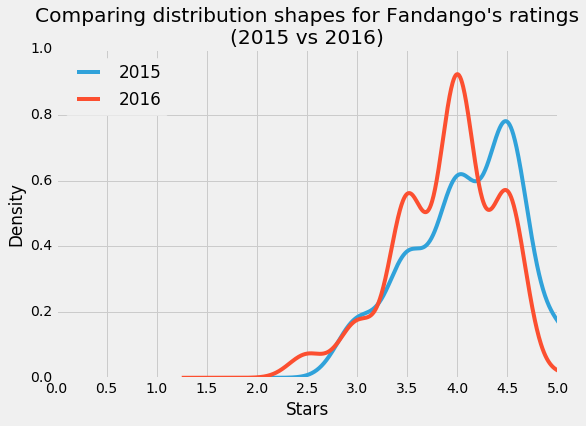

In [12]:
# creating a density plot to observe the distribution of ratings for each year
import matplotlib.pyplot as plt
from numpy import arange
%matplotlib inline
plt.style.use('fivethirtyeight')

fandango_2015['Fandango_Stars'].plot.kde(label = '2015', legend = True, figsize = (8,5.5))
fandango_2016['fandango'].plot.kde(label = '2016', legend = True)

plt.title("Comparing distribution shapes for Fandango's ratings\n(2015 vs 2016)")
plt.xlabel('Stars')
plt.xlim(0,5)
plt.xticks(arange(0,5.1,.5))
plt.show()

Two observations can be made from the plot above;
1. Both distributions are greatly left skewed, this means that most movies on the Fandango website are given high ratings.
2. Our 2015 plot is more to the left that the 2016 plot which means that there was a change in the way ratings were given to movies. Ratings were slightly lower in 2016.

In [13]:
# Examining the frequency of our 2015 movies in percentages
fandango_2015['Fandango_Stars'].value_counts(normalize = True).sort_index()*100

3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [14]:
# Examining the frequency of our 2016 movies in percentages
fandango_2016['fandango'].value_counts(normalize = True).sort_index() * 100

2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

In 2016, very high ratings (4.5 and 5 stars) had significantly lower percentages compared to 2015. In 2016, under 1% of the movies had a perfect rating of 5 stars, compared to 2015 when the percentage was close to 7%. Ratings of 4.5 were also more popular in 2015 — there were approximately 13% more movies rated with a 4.5 in 2015 compared to 2016.

For some other ratings, the percentage went up in 2016. There was a greater percentage of movies in 2016 that received 3.5 and 4 stars, compared to 2015. 3.5 and 4.0 are high ratings and this challenges the direction of the change we saw on the kernel density plots.

In [15]:
# Calculating the mean, median and mode for each year.
mean_2015 = fandango_2015['Fandango_Stars'].mean()
mean_2016 = fandango_2016['fandango'].mean()

median_2015 = fandango_2015['Fandango_Stars'].median()
median_2016 = fandango_2016['fandango'].median()

mode_2015 = fandango_2015['Fandango_Stars'].mode()[0] # the output of Series.mode() is a bit uncommon
mode_2016 = fandango_2016['fandango'].mode()[0]

summary = pd.DataFrame()
summary['2015'] = [mean_2015, median_2015, mode_2015]
summary['2016'] = [mean_2016, median_2016, mode_2016]
summary.index = ['mean', 'median', 'mode']
summary

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


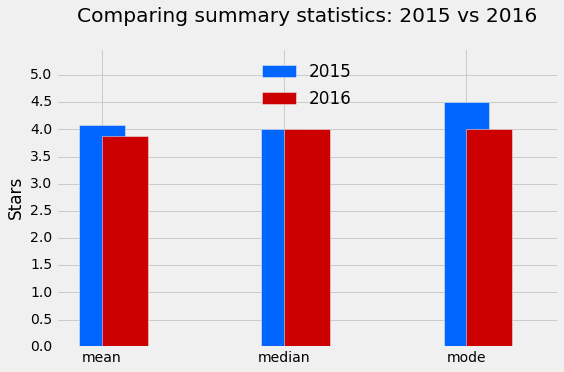

In [16]:
plt.style.use('fivethirtyeight')
summary['2015'].plot.bar(color = '#0066FF', align = 'center', label = '2015', width = .25)
summary['2016'].plot.bar(color = '#CC0000', align = 'edge', label = '2016', width = .25,
                         rot = 0, figsize = (8,5))

plt.title('Comparing summary statistics: 2015 vs 2016', y = 1.07)
plt.ylim(0,5.5)
plt.yticks(arange(0,5.1,.5))
plt.ylabel('Stars')
plt.legend(framealpha = 0, loc = 'upper center')
plt.show()

We can see that the mean rating dropped by almost 0.2 in 2016, a 5% dip relative to the mean rating from the previous year.

Athough the median is equal for both years, we see that there is a difference in the mode. In addition to the mean, this confirms our observation from the density plot that on average popular movies from 2016 were rated lower than popular movies from 2016.

# Conclusion

In conclusion our analysis shows that popular movies from 2016 were given lower rating when compared against popular movies from 2015. Although, there's no certainty as to what caused the change but we can state that it could be due to Fandango fixing the bia sin their rating system after Hickey's publication.